[View in Colaboratory](https://colab.research.google.com/github/keisuke6616/12-NRM/blob/master/Figure3,4.ipynb)

In [0]:
import numpy as np
import numpy.linalg as la

import matplotlib.pyplot as plt

import time

# Figure 3, 4

In [27]:
np.random.seed(42)
t1 = time.time()

d = 1600
iter = 2000
N = [i for i in range(20, 140, 20)]
index = [i for i in range(len(N))]

result = np.zeros((len(N), 2, iter, 3))
mean = np.zeros((len(N), 2, 3))

P = np.array([d**(4/5), d**(3/5), d**(2/5)] +  [1 for i in range(d-3)])

for n, pc in zip(N, index):
    print('Sample size : {}'.format(n))
    for l in range(iter):

        X = np.random.normal(0, 1, (n, d)) * P**(1/2)

        Sd = np.dot(X, X.T) / n
        result[pc, 0, l] = np.sort(la.eigvals(Sd))[::-1][:3]
        result[pc, 1, l] = NRM(Sd, bias=True)[:3]
        
    for i in range(2):
        mean[pc, i] = np.mean(result[pc, i], axis=0)
        
    print('mean of eigenvalues')
    print('dual  : {}'.format(np.round(mean[pc, 0], 3)))
    print('NRM : {}'.format(np.round(mean[pc, 1], 3)))
    print('True : [{: .3f} {: .3f} {:.3f}]'.format(P[0], P[1], P[2]))
    print('Finished')
    print('')

t2 = time.time() - t1
print('Calcuration time : {: .3f}'.format(t2))

Sample size : 20
mean of eigenvalues
dual  : [450.486 160.666 101.549]
NRM : [365.547  79.934  22.042]
True : [ 365.844  83.651 19.127]
Finished

Sample size : 40
mean of eigenvalues
dual  : [411.3   122.374  60.166]
NRM : [368.808  81.985  20.311]
True : [ 365.844  83.651 19.127]
Finished

Sample size : 60
mean of eigenvalues
dual  : [396.533 109.19   46.559]
NRM : [368.21   82.262  19.975]
True : [ 365.844  83.651 19.127]
Finished

Sample size : 80
mean of eigenvalues
dual  : [385.803 102.628  39.663]
NRM : [364.565  82.434  19.722]
True : [ 365.844  83.651 19.127]
Finished

Sample size : 100
mean of eigenvalues
dual  : [381.676  99.074  35.474]
NRM : [364.679  82.915  19.514]
True : [ 365.844  83.651 19.127]
Finished

Sample size : 120
mean of eigenvalues
dual  : [377.906  96.215  32.859]
NRM : [363.745  82.75   19.559]
True : [ 365.844  83.651 19.127]
Finished

Calcuration time :  340.533


In [0]:
Mean = np.zeros((len(N), 2, 3))
Var = np.zeros((len(N), 2, 3))
for n in index:
    for i in range(2):
        Mean[n ,i] = mean[n, i] / P[:3]
        Var[n, i] = np.sum((result[n, i] - mean[n, i])**2, axis=0) / P[:3]**2 / (iter - 1)

        

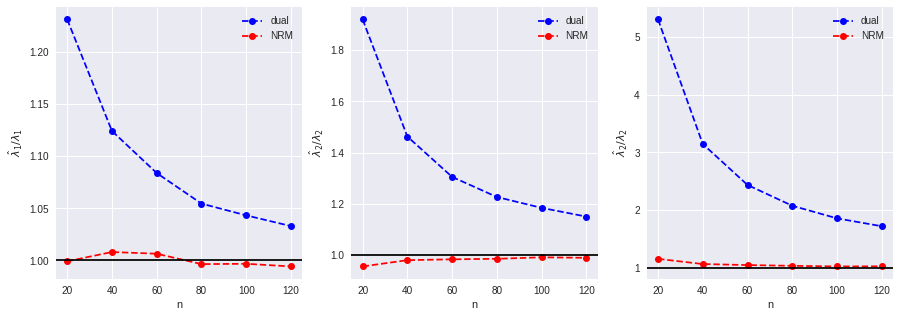

In [29]:
pl = np.arange(20, 140, 20)
ylabel_list = ['$\hat{\lambda}_1/\lambda_1$', '$\hat{\lambda}_2/\lambda_2$', '$\hat{\lambda}_2/\lambda_2$']

fig = plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.plot(pl, Mean[:, 0, i], 'o--', color='blue', label='dual')
    plt.plot(pl, Mean[:, 1, i], 'o--', color='red', label='NRM')
    plt.axhline(y=1, color='black')
    plt.xlabel('n')
    plt.ylabel(ylabel_list[i])
    plt.legend()

plt.show()

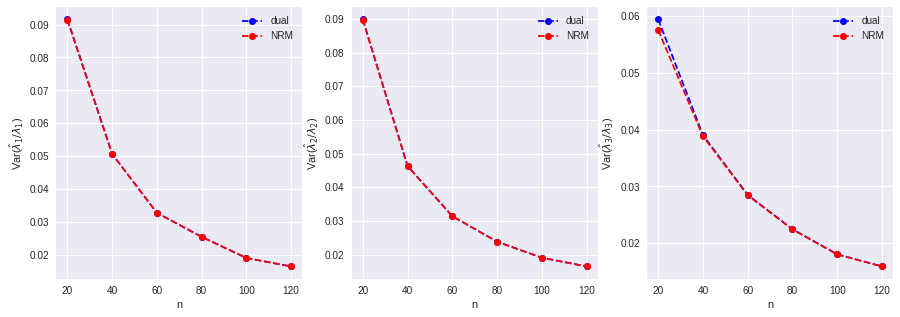

In [30]:
pl = np.arange(20, 140, 20)
ylabel_list = ['Var($\hat{\lambda}_1/\lambda_1$)', 'Var($\hat{\lambda}_2/\lambda_2$)', 'Var($\hat{\lambda}_3/\lambda_3$)']

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.plot(pl, Var[:, 0, i], 'o--', color='blue', label='dual')
    plt.plot(pl, Var[:, 1, i], 'o--', color='red', label='NRM')
    plt.xlabel('n')
    plt.ylabel(ylabel_list[i])
    plt.legend()

plt.show()

# Difinition of NRM

In [0]:
import numpy as np
import numpy.linalg as la

def NRM(Sd, bias=False):
    N = Sd.shape[0]
    value = np.zeros(N)
    
    P = np.sort(la.eigvals(Sd))[::-1]
    
    if bias==False:
        for j in range(N-2):
            value[j] = P[j] - (np.trace(Sd) - np.sum(P[: (j+1)])) / (N - j - 2)
            
    elif bias==True:
        for j in range(N-1):
            value[j] = P[j] - (np.trace(Sd) - np.sum(P[:(j+1)])) / (N - j - 1)
        
    return value
    
    